Assessment of Household & Community Factors on Aedes aegypti Mosquito Population

Thien-An Ha & Robert Castro

Resources used:

* https://towardsdatascience.com/improving-random-forest-in-python-part-1-893916666cd

* https://stackabuse.com/random-forest-algorithm-with-python-and-scikit-learn/

* https://stackoverflow.com/questions/38151615/specific-cross-validation-with-random-forest

In [1]:
# import packages!

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.gridspec as gridspec
from matplotlib.colors import ListedColormap
import matplotlib.colors
import matplotlib.patches as mpatches

from sklearn import ensemble
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
import plotly.express as px

from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype
from pandas.api.types import is_integer_dtype

In [2]:
AApupaecsv = pd.read_csv("GYQDatDS100V01.csv")
AApupaecsv.head(5)

Unnamed: 0  IDP1  PupaeSum  NumCriaderos  PupaeIndex  Illiteracy  \
0           1  2698         1             1           1    2.522908   
1           2  7673        13             1          13    0.551008   
2           3  7374        19             1          19    0.551008   
3           4  7599         4             2           2    0.551008   
4           5  7653         1             1           1    0.551008   

   Unemployment  Overcrowding  LarvaePresence  NumChildren  ...  \
0      7.420226      2.373552             1.0     1.521667  ...   
1      6.698173      1.760226             1.0     2.000000  ...   
2      6.698173      1.760226             1.0     0.000000  ...   
3      6.698173      1.760226             1.0     0.000000  ...   
4      6.698173      1.760226             1.0     1.000000  ...   

   BreedingSites  VolCriadero  OutsideLocation  DirtyWater  WaterVol  \
0            1.0        150.0             1.00        0.00        51   
1            1.0       2160.0             0.00        0.00         1   
2            0.0       5103.0             1.00        0.00         1   
3            0.0      51637.5             0.66        0.33         2   
4            0.0        750.0             0.00        1.00         1   

     XCoord   YCoord     week0      week1      week2  
0 -79.87751 -2.18153  2.667866  33.831691  23.057938  
1 -79.90632 -2.13118  0.000000   0.000000   1.324414  
2 -79.90600 -2.13711  0.000000   0.000000   1.324414  
3 -79.90359 -2.12994  0.000000   0.000000   1.324414  
4 -79.90555 -2.13106  0.000000   0.000000   1.324414  

[5 rows x 31 columns]

# Exploratory Visualizations

#####  Histogram of pupae index

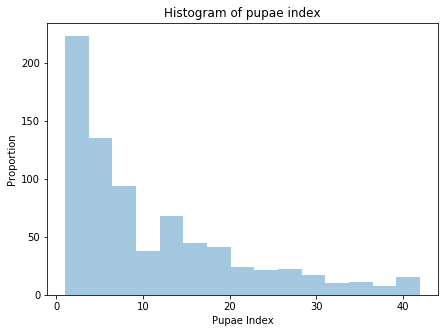

In [3]:
plt.figure(figsize=(7,5))
ch = sns.distplot(AApupaecsv["PupaeIndex"], kde=False)

plt.title("Histogram of pupae index")
plt.xlabel("Pupae Index")
plt.ylabel("Proportion")
plt.show()

# Data Cleaning

In [4]:
cleaned = AApupaecsv

# test that Larvae Presence is only 0 and 1
cleaned['LarvaePresence'] = round(cleaned['LarvaePresence'])
cleaned['LarvaePresence'] = cleaned['LarvaePresence'].astype(int)
print(cleaned['LarvaePresence'].isin([0,1]).value_counts())

# test that Number of Children is only an integer
cleaned['NumChildren'] = round(cleaned['NumChildren'])
cleaned['NumChildren'] = cleaned['NumChildren'].astype(int)
print(is_integer_dtype(cleaned['NumChildren']))

# test that Number of Adults is an integer
cleaned['NumAdults'] = round(cleaned['NumAdults'])
cleaned['NumAdults'] = cleaned['NumAdults'].astype(int)
print(is_integer_dtype(cleaned['NumAdults']))

# test that Interruption Frequency is only 0 or 1
print(cleaned['InterruptFreq'].isin([0,1]).value_counts())

# test that Duration Hours is between 0 and 24
#cleaned['InterruptDurHrs'][cleaned['InterruptDurHrs'] < 0] = 0
cleaned['InterruptDurHrs'] = cleaned['InterruptDurHrs'].mask(cleaned['InterruptDurHrs'].lt(0),0)
cleaned['InterruptDurHrs'] = round(cleaned['InterruptDurHrs'], 2)
print(cleaned['InterruptDurHrs'].between(0,24).any())

# test that Trash Collection per Week is between 0 and 7
print(cleaned['TrashCollectPerWk'].between(0,7).any())

# test that Large Solid Collection is between 0 and 1
cleaned['LargeSolidColl'] = round(cleaned['LargeSolidColl'])
cleaned['LargeSolidColl'] = cleaned['LargeSolidColl'].astype(int)
print(cleaned['LargeSolidColl'].isin([0,1]).value_counts()) 

# test that Sewer Connection is between 0 and 1
cleaned['SewerConn'] = round(cleaned['SewerConn'])
cleaned['SewerConn'] = cleaned['SewerConn'].astype(int)
print(cleaned['SewerConn'].isin([0,1]).value_counts()) 

# test that Fumigation is between 0 and 1 
cleaned['FumigLWs'] = round(cleaned['FumigLWs'])
cleaned['FumigLWs'] = cleaned['FumigLWs'].astype(int)
print(cleaned['FumigLWs'].isin([0,1]).value_counts())

# test that Abate is between 0 and 1 
cleaned['AbateLWs'] = round(cleaned['AbateLWs'])
cleaned['AbateLWs'] = cleaned['AbateLWs'].astype(int)
print(cleaned['AbateLWs'].isin([0,1]).value_counts())

# test that Biolarvicide is between 0 and 1 
cleaned['BiolarvLWs'] = round(cleaned['BiolarvLWs'])
cleaned['BiolarvLWs'] = cleaned['BiolarvLWs'].astype(int)
print(cleaned['BiolarvLWs'].isin([0,1]).value_counts()) 

# test that Canopy Use is between 0 and 1 
cleaned['CanopyUse'] = round(cleaned['CanopyUse'])
cleaned['CanopyUse'] = cleaned['CanopyUse'].astype(int)
print(cleaned['CanopyUse'].isin([0,1]).value_counts()) 

# test that Protective Mesh is between 0 and 1 
cleaned['ProtectMesh'] = round(cleaned['ProtectMesh'])
cleaned['ProtectMesh'] = cleaned['ProtectMesh'].astype(int)
print(cleaned['ProtectMesh'].isin([0,1]).value_counts()) 

# test that Breeding Sites is between 0 and 1 
cleaned['BreedingSites'] = round(cleaned['BreedingSites'])
cleaned['BreedingSites'] = cleaned['BreedingSites'].astype(int)
print(cleaned['BreedingSites'].isin([0,1]).value_counts()) 

# test that Outside Location is between 0 and 1 
cleaned['OutsideLocation'] = round(cleaned['OutsideLocation'])
cleaned['OutsideLocation'] = cleaned['OutsideLocation'].astype(int)
print(cleaned['OutsideLocation'].isin([0,1]).value_counts()) 

# test that Dirty Water is between 0 and 1 
cleaned['DirtyWater'] = round(cleaned['DirtyWater'])
cleaned['DirtyWater'] = cleaned['DirtyWater'].astype(int)
print(cleaned['DirtyWater'].isin([0,1]).value_counts()) 

# test that Water Volume is numerical 
print(is_numeric_dtype(cleaned['WaterVol']))

# test that Volume Criadero is numerical
print(is_numeric_dtype(cleaned['VolCriadero']))
#print(cleaned['VolCriadero'].value_counts())

# test that week 0 is numerical
print(is_numeric_dtype(cleaned['week0']))

# test that week 1 is numerical
print(is_numeric_dtype(cleaned['week1']))

# test that week 2 is numerical
print(is_numeric_dtype(cleaned['week2']))

#cleaned[cleaned.XCoord > 999000] = 0 # omit 0s when graphing spatially
cleaned['XCoord'] = cleaned['XCoord'].mask(cleaned['XCoord'].gt(999000),0)
(cleaned.XCoord > 0).any() or (cleaned.XCoord < -81).any()

# test that Y Coord is between -2 to -3
#cleaned[cleaned.YCoord > 999000] = 0 # omit 0s when graphing spatially
cleaned['XCoord'] = cleaned['XCoord'].mask(cleaned['XCoord'].gt(999000),0)
(cleaned.YCoord > 0).any() or (cleaned.YCoord < -3).any()

cleanmap = cleaned

cleanmap = cleanmap[cleanmap.XCoord != 0]
cleanmap = cleanmap[cleanmap.YCoord != 0]
cleanmap = cleanmap[~(cleanmap['YCoord'] <= -2.30)] 
cleanmap = cleanmap[~(cleanmap['YCoord'] >= -2.075)] 
cleanmap = cleanmap[~(cleanmap['XCoord'] >= -79.8)]
cleanmap = cleanmap[~(cleanmap['XCoord'] <= -80.5)]

True    772
Name: LarvaePresence, dtype: int64
True
True
True    772
Name: InterruptFreq, dtype: int64
True
True
True    772
Name: LargeSolidColl, dtype: int64
True    772
Name: SewerConn, dtype: int64
True    772
Name: FumigLWs, dtype: int64
True    772
Name: AbateLWs, dtype: int64
True    772
Name: BiolarvLWs, dtype: int64
True    772
Name: CanopyUse, dtype: int64
True    772
Name: ProtectMesh, dtype: int64
True    772
Name: BreedingSites, dtype: int64
True    772
Name: OutsideLocation, dtype: int64
True    772
Name: DirtyWater, dtype: int64
True
True
True
True
True


# Data Processing

In [5]:
# scale Number of Children
scaler=MinMaxScaler(feature_range=(0,1))
cleanmap['scaled_NumChildren'] = scaler.fit_transform(cleanmap[['NumChildren']])

# scale Number of Adults
scaler=MinMaxScaler(feature_range=(0,1))
cleanmap['scaled_NumAdults'] = scaler.fit_transform(cleanmap[['NumAdults']])

# scale Duration Hours
scaler=MinMaxScaler(feature_range=(0,1))
cleanmap['scaled_InterruptDurHrs'] = scaler.fit_transform(cleanmap[['InterruptDurHrs']])

# scale Trash Collection per Week
scaler=MinMaxScaler(feature_range=(0,1))
cleanmap['scaled_TrashCollectPerWk'] = scaler.fit_transform(cleanmap[['TrashCollectPerWk']])

# scale Water Volume
scaler=MinMaxScaler(feature_range=(0,1))
cleanmap['scaled_WaterVol'] = scaler.fit_transform(cleanmap[['WaterVol']])

# scale Volume Criadero
scaler=MinMaxScaler(feature_range=(0,1))
cleanmap['scaled_VolCriadero'] = scaler.fit_transform(cleanmap[['VolCriadero']])

# scale week 0
scaler=MinMaxScaler(feature_range=(0,1))
cleanmap['scaled_week0'] = scaler.fit_transform(cleanmap[['week0']])

# scale week 1
scaler=MinMaxScaler(feature_range=(0,1))
cleanmap['scaled_week1'] = scaler.fit_transform(cleanmap[['week1']])

# scale week 2
scaler=MinMaxScaler(feature_range=(0,1))
cleanmap['scaled_week2'] = scaler.fit_transform(cleanmap[['week2']])

# scale pupae index
scaler=MinMaxScaler(feature_range=(0,1))
cleanmap['scaled_PupaeIndex'] = scaler.fit_transform(cleanmap[['PupaeIndex']])

# scale Illiteracy
scaler=MinMaxScaler(feature_range=(0,1))
cleanmap['scaled_Illiteracy'] = scaler.fit_transform(cleanmap[['Illiteracy']])

# scale Unemployment
scaler=MinMaxScaler(feature_range=(0,1))
cleanmap['scaled_Unemployment'] = scaler.fit_transform(cleanmap[['Unemployment']])

# scale Overcrowding
scaler=MinMaxScaler(feature_range=(0,1))
cleanmap['scaled_Overcrowding'] = scaler.fit_transform(cleanmap[['Overcrowding']])

#####  Count plot of larval presence & absence

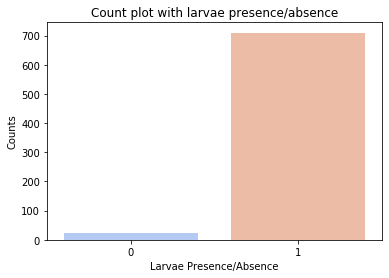

In [6]:
sns.countplot(x='LarvaePresence',data=cleanmap, palette='coolwarm')
plt.title('Count plot with larvae presence/absence')
plt.xlabel("Larvae Presence/Absence")
plt.ylabel("Counts")
plt.show()

##### Density plot

Text(0, 0.5, 'Density')

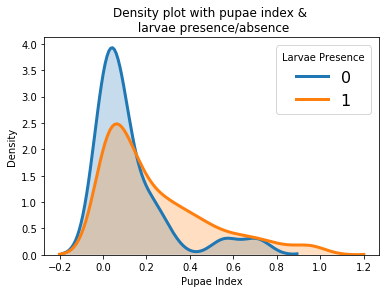

In [7]:
# List of categories to plot
larv = [0, 1]

# Iterate through the 2 categories
for category in larv:
    # Subset to the categories
    subset = cleanmap[cleanmap['LarvaePresence'] == category]
    
    # Draw the density plot
    sns.distplot(subset['scaled_PupaeIndex'], hist = False, kde = True,
                 kde_kws = {'shade': True,'linewidth': 3},
                 label = category)
    
# Plot formatting
plt.legend(prop={'size': 16}, title = 'Larvae Presence')
plt.title('Density plot with pupae index & \n larvae presence/absence')
plt.xlabel('Pupae Index')
plt.ylabel('Density')

##### Density plot

Text(0, 0.5, 'Density')

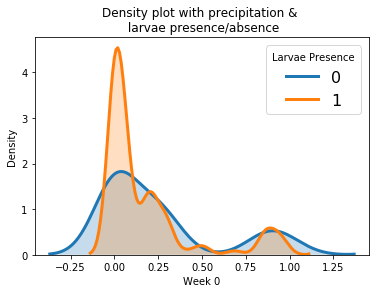

In [8]:
# List of 2 categories to plot
larv = [0, 1]

# Iterate through the 2 categories
for category in larv:
    
    # Subset to the categories
    subset = cleanmap[cleanmap['LarvaePresence'] == category]
    
    # Draw the density plot
    sns.distplot(subset['scaled_week0'], hist = False, kde = True,
                 kde_kws = {'shade': True,'linewidth': 3},
                 label = category)
    
# Plot formatting
plt.legend(prop={'size': 16}, title = 'Larvae Presence')
plt.title('Density plot with precipitation & \n larvae presence/absence')
plt.xlabel('Week 0')
plt.ylabel('Density')

##### Categorical plot

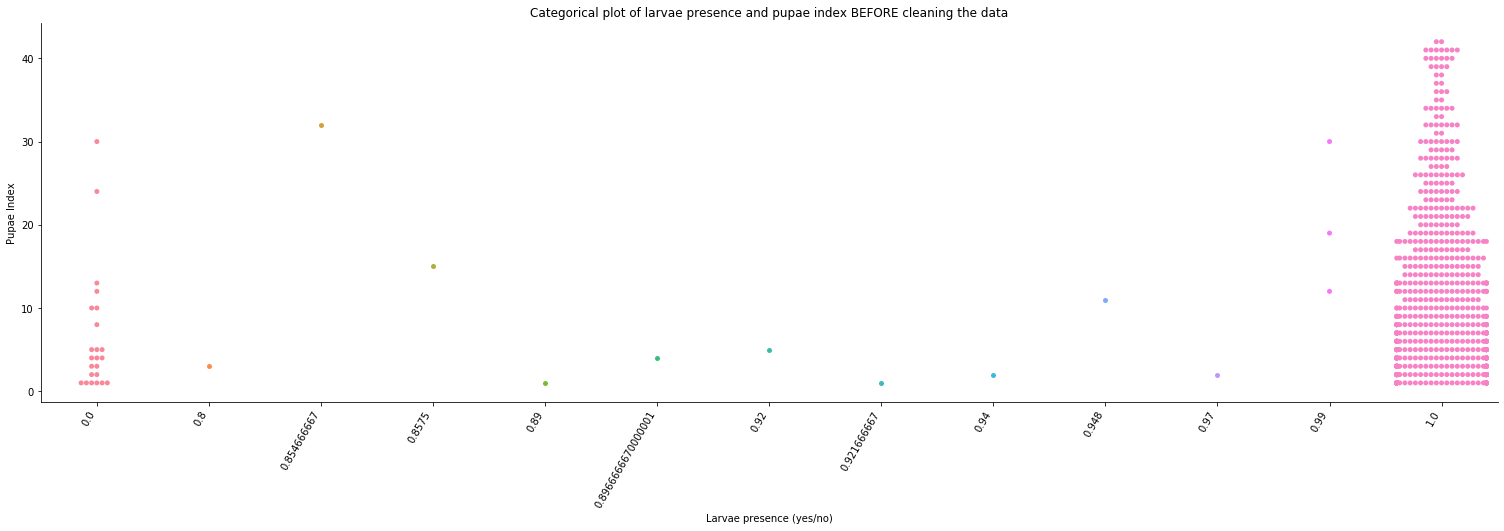

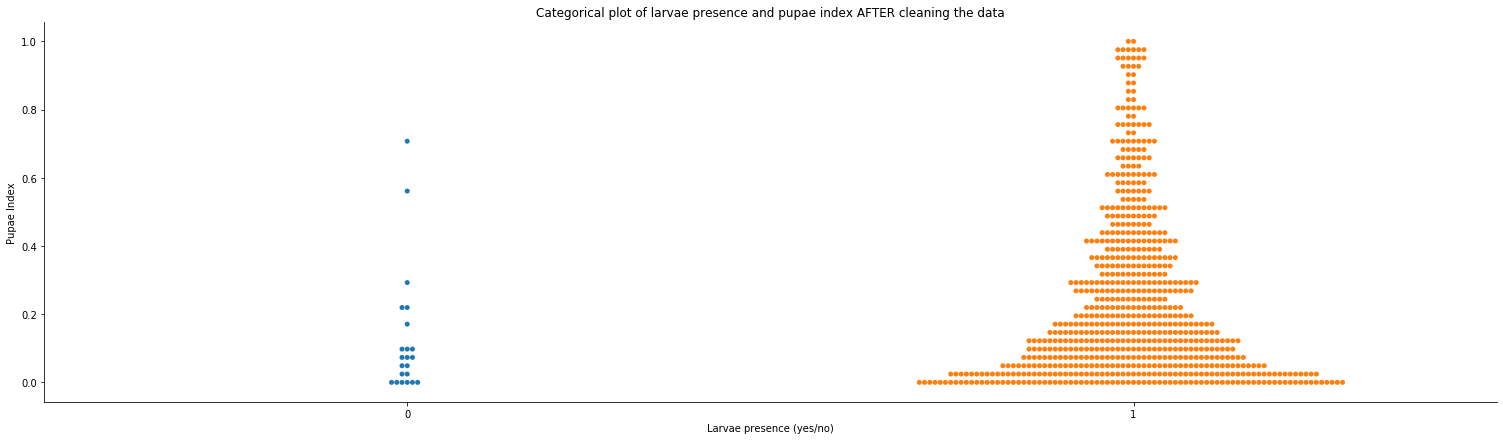

In [9]:
AApupaecsv = pd.read_csv("GYQDatDS100V01.csv")

chart2 = sns.catplot(x="LarvaePresence", y="PupaeIndex", kind="swarm", data=AApupaecsv, height = 6, aspect = 3.5)
plt.title("Categorical plot of larvae presence and pupae index BEFORE cleaning the data")
plt.xlabel("Larvae presence (yes/no)")
plt.ylabel("Pupae Index")
chart2.set_xticklabels(rotation = 60, horizontalalignment='right')
plt.show()

chart3 = sns.catplot(x="LarvaePresence", y="scaled_PupaeIndex", kind="swarm", data=cleanmap, height = 6, aspect = 3.5)
plt.title("Categorical plot of larvae presence and pupae index AFTER cleaning the data")
plt.xlabel("Larvae presence (yes/no)")
plt.ylabel("Pupae Index")
plt.show()

#### Map of Guayaquil

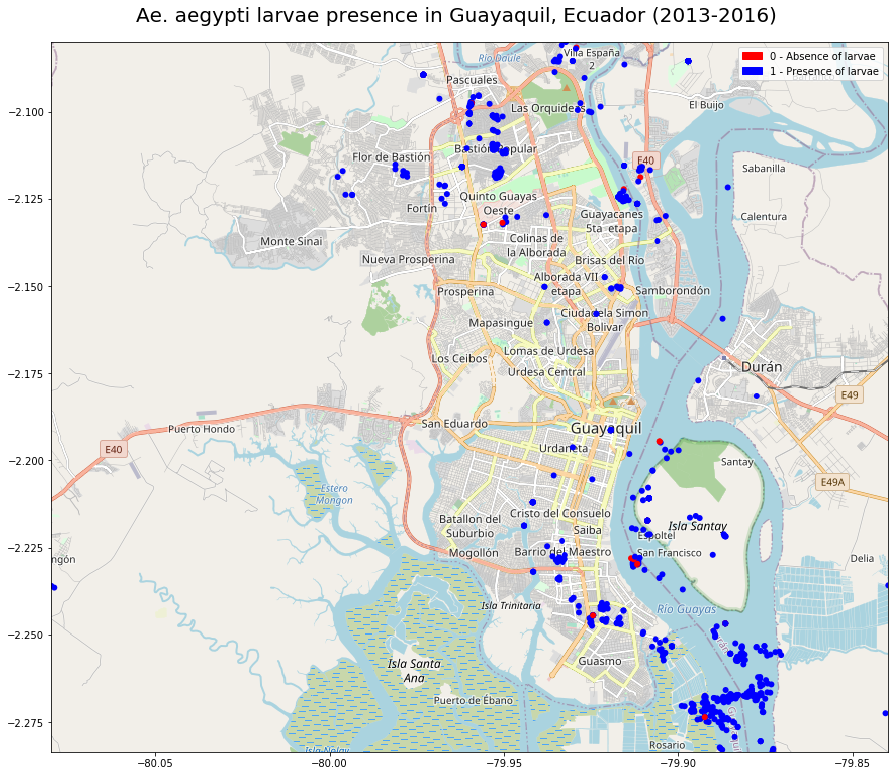

In [10]:
BBox = ((cleanmap.XCoord.min(),   cleanmap.XCoord.max(),      
         cleanmap.YCoord.min(), cleanmap.YCoord.max()))

ruh_m = plt.imread('GuayaquilMap.png')

fig, ax = plt.subplots(figsize = (15,15))
colors = ['red', 'blue']
levels = [0, 1]
cmap, norm = matplotlib.colors.from_levels_and_colors(levels=levels, colors=colors, extend='max')
ax.scatter(cleanmap.XCoord, cleanmap.YCoord, c = cleanmap['LarvaePresence'], linewidths=5, edgecolor='none', cmap=cmap, norm=norm)
plt.figtext(.5,.85,'Ae. aegypti larvae presence in Guayaquil, Ecuador (2013-2016)',fontsize=20,ha='center')
red_patch = mpatches.Patch(color='red', label='0 - Absence of larvae')
blue_patch = mpatches.Patch(color='blue', label='1 - Presence of larvae')
plt.legend(handles=[red_patch, blue_patch])
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(ruh_m, zorder=0, extent = BBox, aspect= 'equal')

# Random Forest Classification

### Baseline Exploration

##### Scatterplot


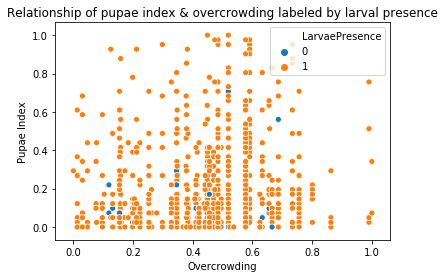

In [11]:
sns.scatterplot(data = cleanmap, x = 'scaled_Overcrowding', y = 'scaled_PupaeIndex', hue = 'LarvaePresence')

plt.title('Relationship of pupae index & overcrowding labeled by larval presence')
plt.xlabel("Overcrowding")
plt.ylabel("Pupae Index")
plt.show();

In [12]:
# Split into train and test
train, test = train_test_split(cleanmap, test_size=0.25, random_state=100)
train = train.sort_values(by='LarvaePresence')
test = test.sort_values(by='LarvaePresence')

# Random Forest
random_forest_model = ensemble.RandomForestClassifier(n_estimators = 20, random_state = 42)
random_forest_model.fit(train[['scaled_Overcrowding','scaled_PupaeIndex']],train['LarvaePresence'])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

##### Run classification on training data


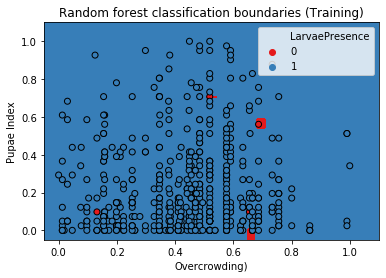

In [13]:
# run on training data
sns_cmap = ListedColormap(np.array(sns.color_palette("Set1"))[0:2, :])
xx, yy = np.meshgrid(np.arange(-0.05, 1.1, 0.01), np.arange(-.05, 1.1, 0.01))
Z_string = random_forest_model.predict(np.c_[xx.ravel(), yy.ravel()])
categories, Z_int = np.unique(Z_string, return_inverse = True)
Z_int = Z_int.reshape(xx.shape)
plt.contourf(xx, yy, Z_int, cmap = sns_cmap)
sns.scatterplot(data = train, x = 'scaled_Overcrowding', y = 'scaled_PupaeIndex', hue = 'LarvaePresence', edgecolor='black',
                linewidth=1, palette = "Set1")
plt.xlabel("Overcrowding)")
plt.ylabel("Pupae Index")
plt.title('Random forest classification boundaries (Training)');

##### Run classification on testing data


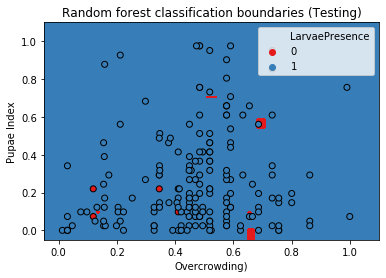

In [14]:
# run on training data
sns_cmap = ListedColormap(np.array(sns.color_palette("Set1"))[0:2, :])
xx, yy = np.meshgrid(np.arange(-0.05, 1.1, 0.01), np.arange(-.05, 1.1, 0.01))
Z_string = random_forest_model.predict(np.c_[xx.ravel(), yy.ravel()])
categories, Z_int = np.unique(Z_string, return_inverse = True)
Z_int = Z_int.reshape(xx.shape)
plt.contourf(xx, yy, Z_int, cmap = sns_cmap)
sns.scatterplot(data = test, x = 'scaled_Overcrowding', y = 'scaled_PupaeIndex', hue = 'LarvaePresence', edgecolor='black',
                linewidth=1, palette = "Set1")
plt.xlabel("Overcrowding)")
plt.ylabel("Pupae Index")
plt.title('Random forest classification boundaries (Testing)');

##### Classification accuracy


In [15]:
# Model Score
rf_train_accuracy = random_forest_model.score(train[['scaled_Overcrowding','scaled_PupaeIndex']],train['LarvaePresence'])
rf_test_accuracy = random_forest_model.score(test[['scaled_Overcrowding','scaled_PupaeIndex']], test['LarvaePresence'])

print("Random Forest Baseline Train Accuracy:", rf_train_accuracy)
print("Random Forest Baseline Test Accuracy:", rf_test_accuracy)

Random Forest Baseline Train Accuracy: 0.9817850637522769
Random Forest Baseline Test Accuracy: 0.9672131147540983


## All features classification

In [16]:
# Define X and y
X = cleanmap.iloc[:,11:44] 
X = X.drop(columns = ['InterruptDurHrs', 'TrashCollectPerWk','WaterVol',
                      'VolCriadero','week0','week1','week2'])

y = cleanmap['LarvaePresence'] # larvae presence  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [17]:
random_forest_model = ensemble.RandomForestClassifier(n_estimators = 100, random_state = 42)
random_forest_model.fit(X_train,y_train)

y_pred_train = random_forest_model.predict(X_train)
y_pred = random_forest_model.predict(X_test)

#### Accuracy Scores for Training and Testing set

In [18]:
rf_train_accuracy = random_forest_model.score(X_train,y_pred_train)
rf_test_accuracy = random_forest_model.score(X_test,y_pred)

print("Random Forest All Features Train Accuracy:", rf_train_accuracy)
print("Random Forest All Features Test Accuracy:", rf_test_accuracy)

Random Forest All Features Train Accuracy: 1.0
Random Forest All Features Test Accuracy: 1.0


#### 10-Fold Cross-validation under Initial Model

In [19]:
print("Random Forest All Features CV Accuracy:", np.mean(cross_val_score(random_forest_model, X, y, cv=15)))

Random Forest All Features CV Accuracy: 0.9673911564625848


#### List Feature Importances for Full Data

In [20]:
importances = list(random_forest_model.feature_importances_)
feature_list = list(X.columns)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 3)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
vars = ['Variable: {:26} Importance: {}'.format(*pair) for pair in feature_importances]
for v in vars:
    print(v)

Variable: scaled_PupaeIndex          Importance: 0.107
Variable: YCoord                     Importance: 0.087
Variable: scaled_NumChildren         Importance: 0.084
Variable: scaled_NumAdults           Importance: 0.082
Variable: scaled_WaterVol            Importance: 0.08
Variable: scaled_Overcrowding        Importance: 0.065
Variable: scaled_VolCriadero         Importance: 0.062
Variable: scaled_week0               Importance: 0.056
Variable: scaled_InterruptDurHrs     Importance: 0.052
Variable: scaled_Illiteracy          Importance: 0.046
Variable: scaled_week1               Importance: 0.037
Variable: scaled_week2               Importance: 0.037
Variable: XCoord                     Importance: 0.036
Variable: scaled_Unemployment        Importance: 0.033
Variable: ProtectMesh                Importance: 0.021
Variable: DirtyWater                 Importance: 0.019
Variable: scaled_TrashCollectPerWk   Importance: 0.019
Variable: FumigLWs                   Importance: 0.016
Variable: A

#### How many features do we need to have 80% importance retained from this model?

Number of features for 90% importance: 16


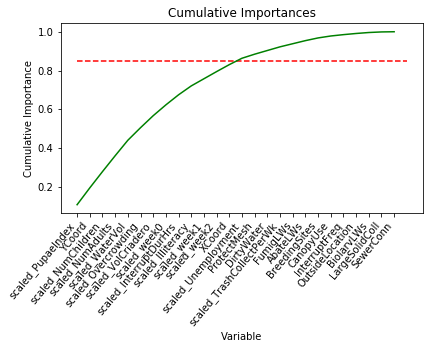

In [21]:
# list of x locations for plotting
x_values = list(range(len(importances)))

# List of features sorted from most to least important
sorted_importances = [importance[1] for importance in feature_importances]
sorted_features = [importance[0] for importance in feature_importances]

# Cumulative importances
cumulative_importances = np.cumsum(sorted_importances)

# Line graph
plt.figure(figsize=(6.5, 3.5))
plt.plot(x_values, cumulative_importances, 'g-')

# Draw line at 90% of importance retained
plt.hlines(y = 0.85, xmin=0, xmax=len(sorted_importances), color = 'r', linestyles = 'dashed')

# Format graph

plt.xticks(x_values, sorted_features, rotation =50, horizontalalignment = 'right')
plt.xlabel('Variable'); plt.ylabel('Cumulative Importance'); plt.title('Cumulative Importances');

# Find number of features for cumulative importance of 90%
# Add 1 because Python is zero-indexed
print('Number of features for 90% importance:', np.where(cumulative_importances > 0.90)[0][0] + 1)

#### Grid for Parameter Tuning

In [22]:
param_grid = {
                 'n_estimators': [15, 20, 25, 50],
                 'max_depth': [2, 5, 7, 9, 11, 13, 15],
                 'min_samples_leaf':[2,5,7,9,11,13,15]
             }


grid_clf = GridSearchCV(random_forest_model, param_grid, cv=10)
grid_clf.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'ma

#### Best Model Parameters

In [23]:
grid_clf.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=2, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=15,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

#### Implement Best Model Parameters

In [24]:
classifier = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=13, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=15,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)




classifier.fit(X_train, y_train)
y_pred_train = classifier.predict(X_train)
y_pred = classifier.predict(X_test)

rf_train_accuracy = classifier.score(X_train,y_pred_train)
rf_test_accuracy = classifier.score(X_test,y_pred)

print("Random Forest All Features Parameter-Tuned Train Accuracy:", rf_train_accuracy)
print("Random Forest All Features Parameter-Tuned Test Accuracy:", rf_test_accuracy)

Random Forest All Features Parameter-Tuned Train Accuracy: 1.0
Random Forest All Features Parameter-Tuned Test Accuracy: 1.0


#### 15-Fold Cross-validation under Parameter-tuned Model

In [25]:
print("Random Forest All Features Parameter-Tuned CV Accuracy:", np.mean(cross_val_score(classifier, X, y, cv=15)))

Random Forest All Features Parameter-Tuned CV Accuracy: 0.970113378684807


##  Omit features based off of importance and prediction accuracy to avoid overfitting

In [26]:
# Drop columns that are less important
optimize_X = X
optimize_X = optimize_X.drop(columns = ['scaled_TrashCollectPerWk', 'FumigLWs', 'AbateLWs', 
                                       'BreedingSites', 'CanopyUse', 'InterruptFreq',
                                       'OutsideLocation', 'BiolarvLWs', 'LargeSolidColl',
                                       'SewerConn'])       

In [27]:
list(optimize_X)

['ProtectMesh',
 'DirtyWater',
 'XCoord',
 'YCoord',
 'scaled_NumChildren',
 'scaled_NumAdults',
 'scaled_InterruptDurHrs',
 'scaled_WaterVol',
 'scaled_VolCriadero',
 'scaled_week0',
 'scaled_week1',
 'scaled_week2',
 'scaled_PupaeIndex',
 'scaled_Illiteracy',
 'scaled_Unemployment',
 'scaled_Overcrowding']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(optimize_X, y, test_size=0.2, random_state=42)

classifier_2 = RandomForestClassifier(random_state=42, n_estimators = 20)
classifier_2.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [29]:

y_pred_train = classifier_2.predict(X_train)
y_pred = classifier_2.predict(X_test)

rf_train_accuracy = classifier_2.score(X_train,y_pred_train)
rf_test_accuracy = classifier_2.score(X_test,y_pred)

print("Random Forest Optimized Train Accuracy:", rf_train_accuracy)
print("Random Forest Optimized Test Accuracy:", rf_test_accuracy)

Random Forest Train Accuracy: 1.0
Random Forest Test Accuracy: 1.0


In [30]:
print("Random Forest Optimized CV Accuracy:",np.mean(cross_val_score(classifier_2, optimize_X, y, cv=15)))

Random Forest Optimized CV Accuracy: 0.9592244897959181


#### 15-fold CV based off of previous grid search of parameters

Optimized model parameters are the same between the more parsimonious model and the model with all features included. 

In [31]:
print("Random Forest Optimized Parameter-Tuned CV Accuracy:",np.mean(cross_val_score(classifier,optimize_X, y, cv=15)))

Random Forest Optimized Parameter-Tuned CV Accuracy: 0.970113378684807


There is no change in prediction accuracy using 15-fold CV which validates the exclusion of many features at risk of over-fitting the model. 

# Exploratory PCA for future studies 

In [33]:
features = X

# does not need standardizing because previously done
u,s,vt = np.linalg.svd(features, full_matrices = False)
u.shape, s, vt.shape
P = u @ np.diag(s)
first_2_pcs = pd.DataFrame(data=P[:,0:2],)  
first_2_pcs.columns = ['pc1', 'pc2']
first_2_pcs.head()


pc1       pc2
0 -79.939348 -0.251050
1 -79.947548  0.319961
2 -79.947253 -0.829563
3 -79.954863 -0.145776
4 -79.934382 -0.318002

In [35]:
first_2_pcs_jittered = first_2_pcs.loc[:,'pc1':'pc2'] + np.random.normal(0, 0.1, size = (len(first_2_pcs),2));
first_2_pcs_jittered


first_2_pcs_jittered
fig = px.scatter(first_2_pcs_jittered, x="pc1", y="pc2", text=list(features.index))
fig.update_traces(textposition='bottom left')
fig.show()

In [36]:
total_variance = np.sum(np.square(s)) / features.shape[0]
print("total_variance: {:.3f} should approximately equal the sum of feature variances: {:.3f}"
      .format(total_variance, np.sum(np.var(features, axis=0))))

two_dim_variance = (np.sum(np.square(s[:2])) / features.shape[0]) / total_variance
two_dim_variance

total_variance: 6398.387 should approximately equal the sum of feature variances: 2.698


0.9996715431562266

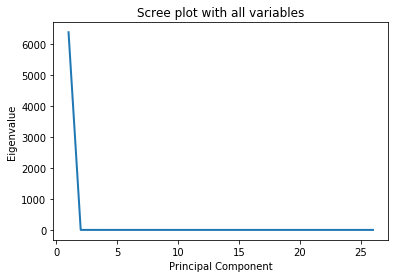

In [37]:
eigvals = s**2 /len(features) 

num_vars = 26
sing_vals = np.arange(num_vars) + 1
plt.plot(sing_vals, eigvals, linewidth=2)
plt.title('Scree plot with all variables')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')


plt.show()

### Exploratory PCA with solely continuous variables

#### Data clean with only continuous variables

In [38]:
features_x = X.iloc[:,14:26]
list(features_x)

['scaled_NumAdults',
 'scaled_InterruptDurHrs',
 'scaled_TrashCollectPerWk',
 'scaled_WaterVol',
 'scaled_VolCriadero',
 'scaled_week0',
 'scaled_week1',
 'scaled_week2',
 'scaled_PupaeIndex',
 'scaled_Illiteracy',
 'scaled_Unemployment',
 'scaled_Overcrowding']

#### Create principal component matrix

In [39]:
u,s,vt = np.linalg.svd(features_x, full_matrices = False)
u.shape, s, vt.shape
P = u @ np.diag(s)
first_2_pcs_cont = pd.DataFrame(data=P[:,0:2],)  
first_2_pcs_cont.columns = ['pc1', 'pc2']
first_2_pcs_cont.head()

pc1       pc2
0 -0.944993 -0.543734
1 -0.558495  0.466933
2 -0.651432  0.197047
3 -0.479338  0.188514
4 -0.424570  0.129167

#### Visualize first principal component against second principal component

In [40]:
first_2_pcs_jittered = first_2_pcs_cont.loc[:,'pc1':'pc2'] + np.random.normal(0, 0.1, size = (len(first_2_pcs_cont),2));

fig = px.scatter(first_2_pcs_jittered, x="pc1", y="pc2", text=list(features_x.index))
fig.update_traces(textposition='bottom left')
fig.show()

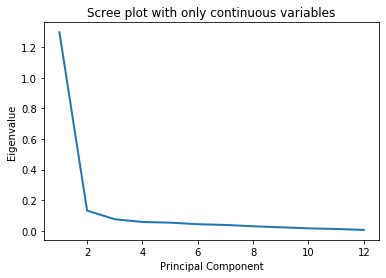

In [41]:
eigvals = s**2 /len(features_x) 

num_vars = 12
sing_vals = np.arange(num_vars) + 1
plt.plot(sing_vals, eigvals, linewidth=2)
plt.title('Scree plot with only continuous variables')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')


plt.show()

We find that PCA is most interpretable with continuous data which should be kept in mind if the aim of future studies is to implement this method. We may use PCA for dimensionality reduction and use for future logistic regression or classification models instead of method we have used above for omitting features. 